In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/onlinefrauddetection/onlinefraud.csv


# **About Dataset**
To identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments. For this, we need a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud. For this task, I collected a dataset from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments. Below are all the columns from the dataset I’m using here:


    step: represents a unit of time where 1 step equals 1 hour
    type: type of online transaction
    amount: the amount of the transaction
    nameOrig: customer starting the transaction
    oldbalanceOrg: balance before the transaction
    newbalanceOrig: balance after the transaction
    nameDest: recipient of the transaction
    oldbalanceDest: initial balance of recipient before the transaction
    newbalanceDest: the new balance of recipient after the transaction
    isFraud: fraud transaction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

from sklearn.model_selection import train_test_split

In [38]:
df = pd.read_csv("/kaggle/input/onlinefrauddetection/onlinefraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [39]:
# check the rows and columns
df.shape

(6362620, 11)

In [40]:
# info of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [41]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [42]:
# check missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

no missing values in dataset

In [43]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [44]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [45]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [46]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

# **Data visualization**

<Axes: xlabel='isFlaggedFraud'>

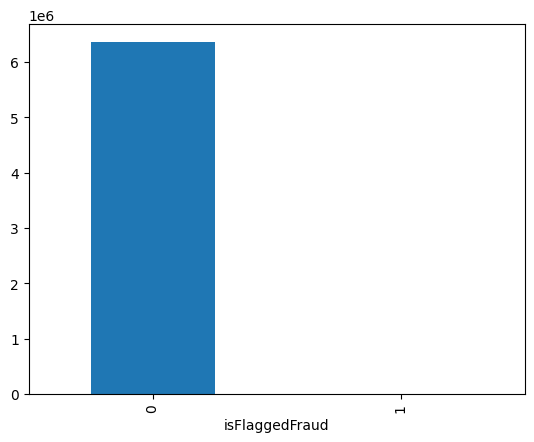

In [47]:
df['isFlaggedFraud'].value_counts().plot(kind='bar')

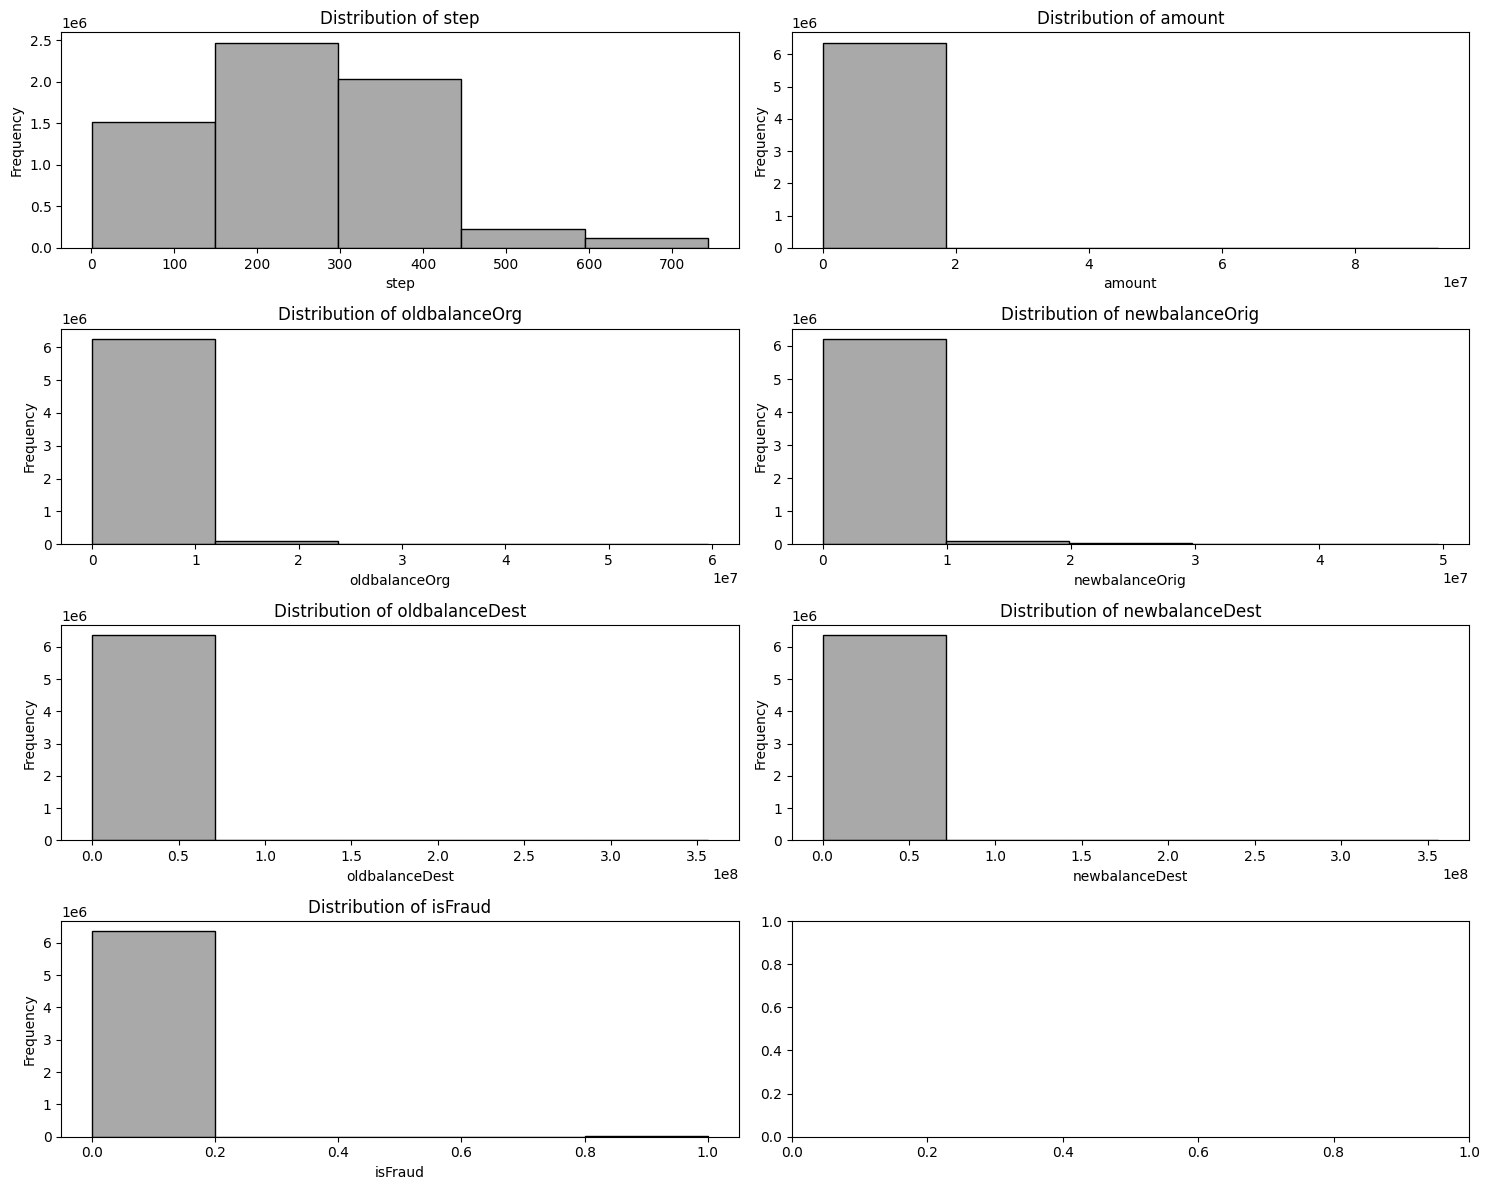

In [48]:
%matplotlib inline

feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest', 'isFraud']

# Determine the number of rows and columns for subplots
num_rows = (len(feature) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, ax in zip(feature, axes):
    df[i].plot(kind='hist', bins=5, ax=ax, facecolor='darkgray', edgecolor='black')
    ax.set_title(f"Distribution of {i}")
    ax.set_xlabel(i)

# Adjust layout
plt.tight_layout()
plt.show()

# check outlier through box plot

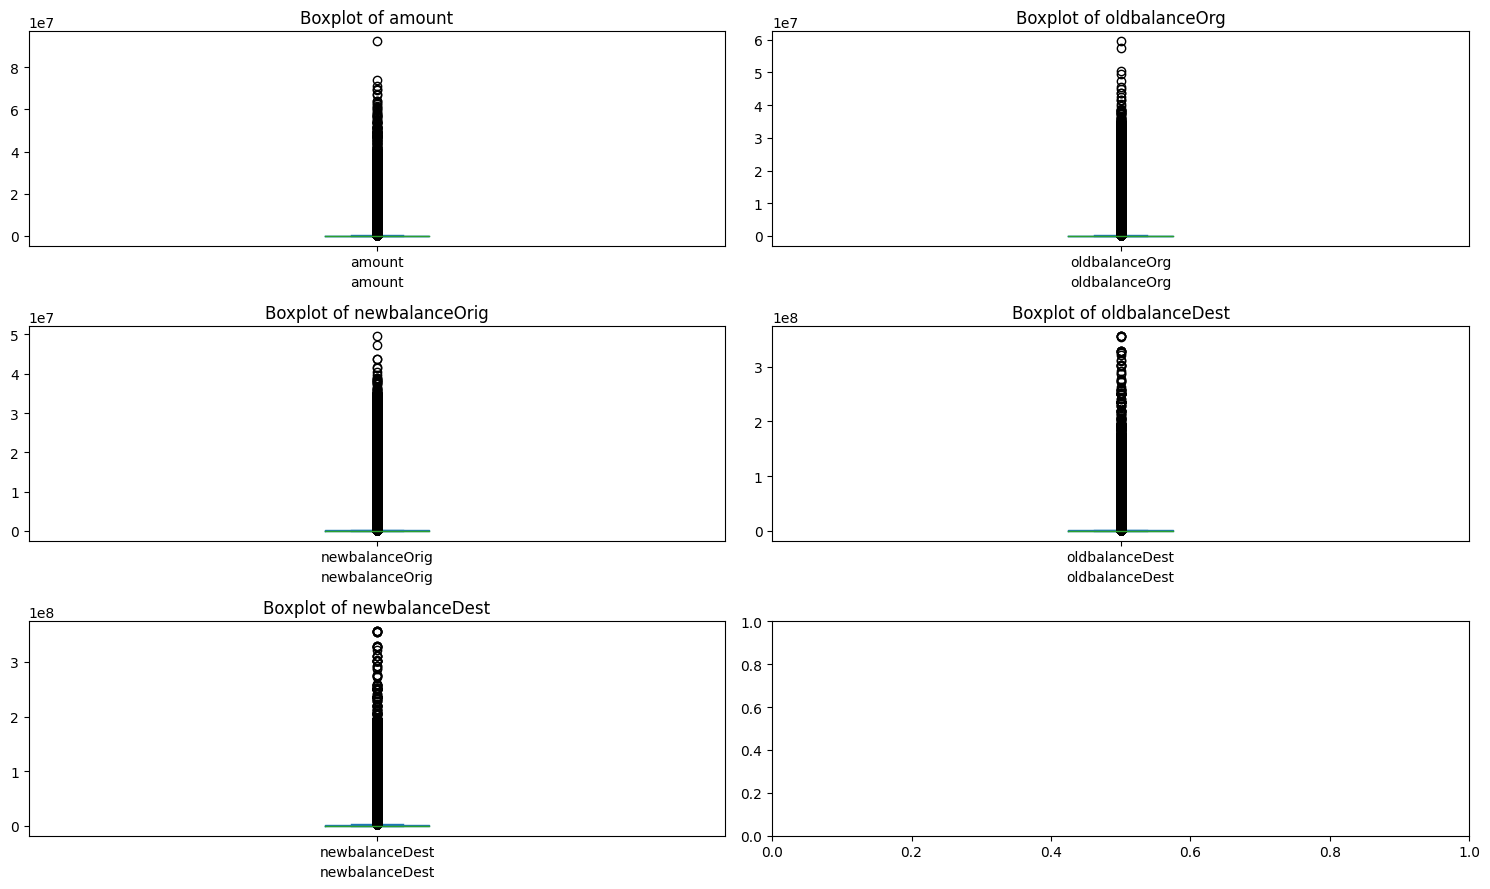

In [49]:
%matplotlib inline

feature = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Determine the number of rows and columns for subplots
num_rows = (len(feature) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, ax in zip(feature, axes):
    df[i].plot(kind='box', ax=ax)
    ax.set_title(f"Boxplot of {i}")
    ax.set_xlabel(i)

# Adjust layout
plt.tight_layout()
plt.show()


#### now we will remove outlier. we will detect with different methods. one common method is to use skewness.

In [50]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




#### after removing outlier now we will check again

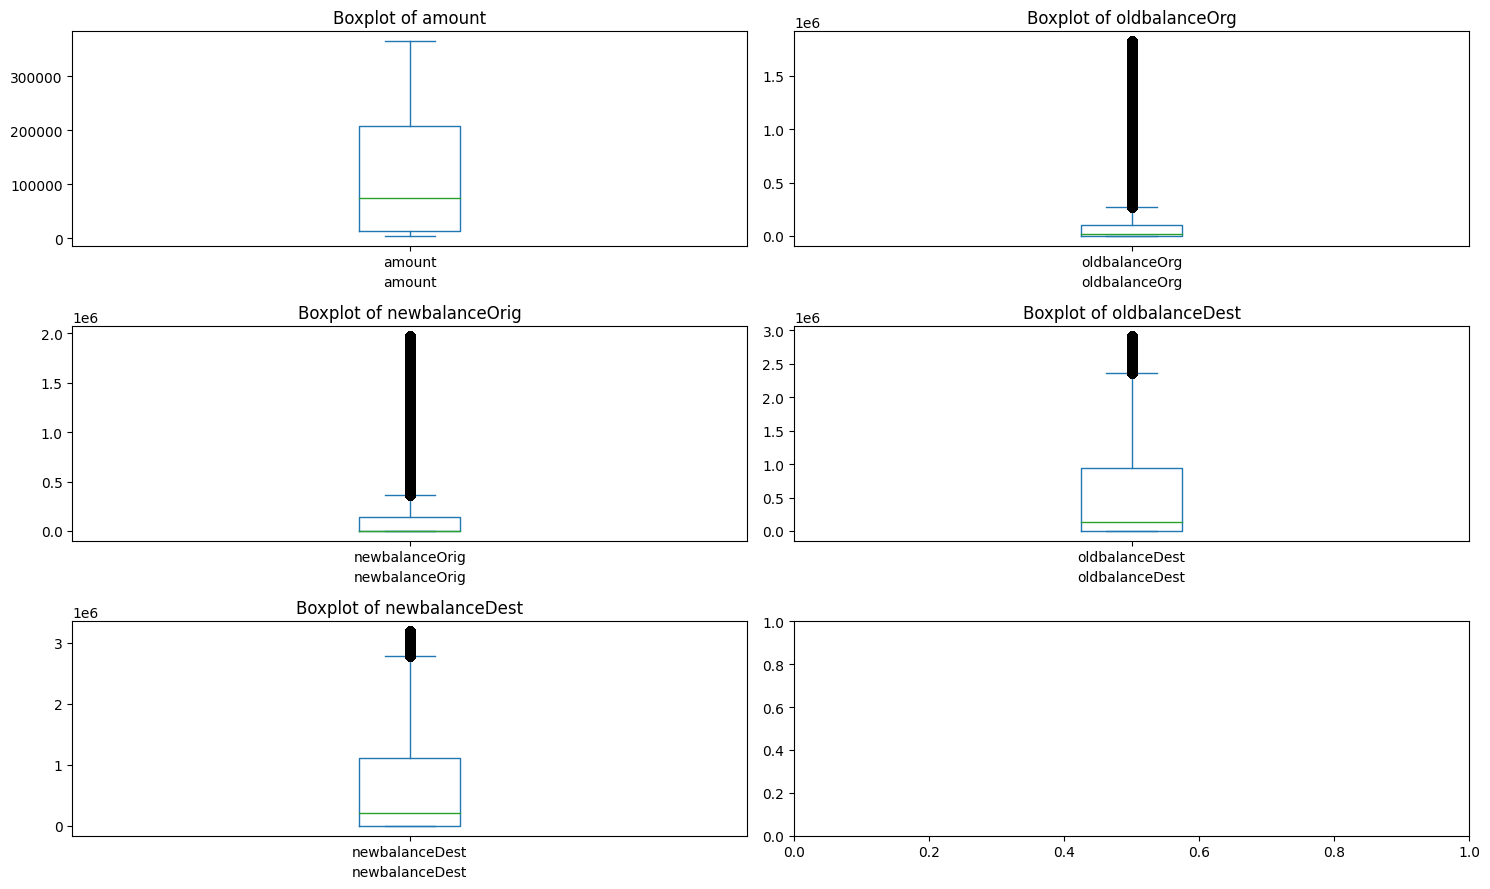

In [51]:
%matplotlib inline

feature = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Determine the number of rows and columns for subplots
num_rows = (len(feature) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, ax in zip(feature, axes):
    df[i].plot(kind='box', ax=ax)
    ax.set_title(f"Boxplot of {i}")
    ax.set_xlabel(i)

# Adjust layout
plt.tight_layout()
plt.show()


<Axes: ylabel='count'>

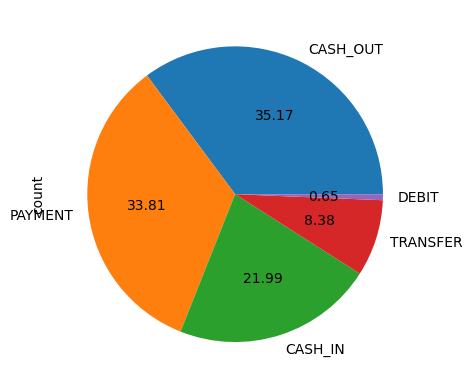

In [52]:
df.type.value_counts().plot(kind  = 'pie',autopct = "%.2f")

# **Model evaluation**

In [16]:
from sklearn.preprocessing import LabelEncoder
# encode the categorical variables using for loop where object and categoy datatypes are given
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,4501.30,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,4501.30,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,4501.30,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [17]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [18]:
# splitting the data in training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# load libraries

In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

#### We selected five distinct models to determine the optimal candidate.

In [20]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

In [21]:
best_model = None
best_accuracy = 0.0

#### Iterating over models, we create pipelines with imputation, encoding, and the respective model 
#### for performance evaluation.

In [22]:
# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])

# **cross-validation**
use cross-validation to get a more reliable estimate of the model's performance

In [23]:
# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [24]:
# Calculate mean accuracy
mean_accuracy = scores.mean()

In [25]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore')),
                ('model', LogisticRegression(random_state=42))])

In [26]:
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

In [27]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

#### prints out the model's name along with its cross-validation accuracy and test accuracy, facilitating performance assessment.

In [28]:
# Print the performance metrics
print("Model:", name)
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)
print()

Model: Logistic Regression
Cross-validation Accuracy: 0.999389402481053
Test Accuracy: 0.9994090484737419



In [30]:
# Check if the current model has the best accuracy
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)


Best Model: Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore')),
                ('model', LogisticRegression(random_state=42))])


#### In Python, you can use the joblib module from the scikit-learn library to serialize (save) and deserialize (load) your trained models. Here's how you can do it:

In [35]:
import joblib

# Assuming 'pipeline' is your trained pipeline
joblib.dump(pipeline, 'trained_model.pkl')


['trained_model.pkl']

# **observation:**
1. We experimented with various models, encoders, and imputers.
2. Our primary objective was to identify the most effective combination for online fraud detection.
3. Upon thorough analysis, we discovered that the logistic regression model, OneHotEncoder for encoding 4. categorical features, and SimpleImputer for handling missing values yielded the best performance.
5. Subsequently, we saved the trained model in a pickle file (model.pkl).
### How many no of fraud cases in online payment and flagged as fraud
6. Number of fraud cases in online payments:
**635,4407** transactions were not fraudulent.
**8,213** transactions were identified as fraudulent.

7. Number of cases flagged as fraud:
Out of **6,362,620** transactions, only **16** were flagged as potential fraud.

#### it appears as though out of a total of 6,362,620 transactions, only 16 were flagged as potentially fraudulent. This means that these 16 transactions raised suspicion or met certain criteria that warranted further investigation for potential fraud.